# **Use the PDBe API to retrieve information about the co-crystallized ligands of SOS1

Son of Sevenless homolog 1**

Retrieve PDB Entries for SOS1 and mount drive

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
job_description = '/content/drive/MyDrive/InterviewExercise'
import os
files = os.listdir(job_description)
print(files)

['Copy_of_Job_Description_&_Exercices.ipynb', 'SOS1.json', '.ipynb_checkpoints', 'SOS1.csv']


# Task 1
**Use the PDBe API to retrieve information about the co-crystallized ligands of SOS1. Leverage the JSON format to produce a well-organized CSV (index=PDBID) containing the most valuable data. Three-letter code and SMILES reppresentation are compulsory features.**

In [106]:
import requests # import the request module

In [107]:
uniprot_id = 'Q07889' # SOS1 UniprotID
url = f"https://www.ebi.ac.uk/pdbe/api/mappings/best_structures/Q07889" # to get the PDB entries that contain the compound from PDBe API url
# this retrieves the best PDB structure mappings available for SOS1 Q07899

In [108]:
entries = requests.get(url) # the request module help get data from the url

In [109]:
import json
#To be sure if the requests get was succesful
if entries.status_code == 200:
  print("Request successful")
  SOS1_data = entries.json()
  print(SOS1_data)
else:
  SOS1_data = None
  print(f"Data retrieval failed with status code: {entries.status_code}")
  print(entries.text)



Request successful
{'Q07889': [{'pdb_id': '3ksy', 'chain_id': 'A', 'experimental_method': 'X-ray diffraction', 'tax_id': 9606, 'coverage': 0.787, 'resolution': 3.178, 'start': 1, 'end': 1049, 'unp_start': 1, 'unp_end': 1049}, {'pdb_id': '1xd4', 'chain_id': 'A', 'experimental_method': 'X-ray diffraction', 'tax_id': 9606, 'coverage': 0.639, 'resolution': 3.64, 'start': 1, 'end': 852, 'unp_start': 198, 'unp_end': 1049}, {'pdb_id': '1xd4', 'chain_id': 'B', 'experimental_method': 'X-ray diffraction', 'tax_id': 9606, 'coverage': 0.639, 'resolution': 3.64, 'start': 1, 'end': 852, 'unp_start': 198, 'unp_end': 1049}, {'pdb_id': '1xdv', 'chain_id': 'A', 'experimental_method': 'X-ray diffraction', 'tax_id': 9606, 'coverage': 0.635, 'resolution': 4.1, 'start': 1, 'end': 847, 'unp_start': 198, 'unp_end': 1044}, {'pdb_id': '1xdv', 'chain_id': 'B', 'experimental_method': 'X-ray diffraction', 'tax_id': 9606, 'coverage': 0.635, 'resolution': 4.1, 'start': 1, 'end': 847, 'unp_start': 198, 'unp_end': 104

In [110]:
import pandas as pd
import numpy as np
SOS1_json = pd.read_json('/content/drive/MyDrive/InterviewExercise/SOS1.json')
SOS1_json.head()
# save to csv
SOS1_csv = '/content/drive/MyDrive/InterviewExercise/SOS1.csv'
SOS1_json.to_csv(SOS1_csv, index='pdb_id')
SOS1_csv_df = pd.read_csv(SOS1_csv)
SOS1_json.head()


Q07889
0  {'pdb_id': '3ksy', 'chain_id': 'A', 'experimen...
1  {'pdb_id': '1xd4', 'chain_id': 'A', 'experimen...
2  {'pdb_id': '1xd4', 'chain_id': 'B', 'experimen...
3  {'pdb_id': '1xdv', 'chain_id': 'A', 'experimen...
4  {'pdb_id': '1xdv', 'chain_id': 'B', 'experimen...

The above dataframe does not look proper!!

In [111]:
import json # import json

In [112]:
with open ('/content/drive/MyDrive/InterviewExercise/SOS1.json') as jf:
  data = json.load(jf)


In [113]:
data.keys()

dict_keys(['Q07889'])

In [114]:
# data.values() # this code prints all the values in Q07889

In [115]:
df = pd.json_normalize(data, record_path="Q07889") # this normalises the list of dictionaries to a proper csv DataFrame
df

pdb_id chain_id experimental_method  tax_id  coverage  resolution  start  \
0     3ksy        A   X-ray diffraction    9606     0.787       3.178      1   
1     1xd4        A   X-ray diffraction    9606     0.639       3.640      1   
2     1xd4        B   X-ray diffraction    9606     0.639       3.640      1   
3     1xdv        A   X-ray diffraction    9606     0.635       4.100      1   
4     1xdv        B   X-ray diffraction    9606     0.635       4.100      1   
..     ...      ...                 ...     ...       ...         ...    ...   
103   6y44        P   X-ray diffraction    9606     0.010       1.710      1   
104   6f08        D   X-ray diffraction    9606     0.010       1.900      1   
105   6f08        K   X-ray diffraction    9606     0.010       1.900      1   
106   6f08        N   X-ray diffraction    9606     0.010       1.900      1   
107   6f08        Q   X-ray diffraction    9606     0.010       1.900      1   

      end  unp_start  unp_end  
0    1049          1     1049  
1     852        198     1049  
2     852        198     1049  
3     847        198     1044  
4     847        198     1044  
..    ...        ...      ...  
103    13       1155     1167  
104    13       1155     1167  
105    13       1155     1167  
106    13       1155     1167  
107    13       1155     1167  

[108 rows x 10 columns]

In [116]:
df['pdb_id'] # PDB Entries associated with SOS1 Q07889

0      3ksy
1      1xd4
2      1xd4
3      1xdv
4      1xdv
       ... 
103    6y44
104    6f08
105    6f08
106    6f08
107    6f08
Name: pdb_id, Length: 108, dtype: object

In [117]:
!pip install rdkit-pypi # instal rdkit

**Extract the co-crystalized Ligands**

In [118]:

# Step 1: Get PDB IDs associated with the protein (using UniProt ID)
uniprot_id = 'Q07889'  # Example: SOS1 protein
url = f"https://www.ebi.ac.uk/pdbe/api/mappings/best_structures/{uniprot_id}"

try:
    response = requests.get(url)
    response.raise_for_status()  # this checks for HTTP errors
    data = response.json()

    # Extract PDB IDs
    pdb_ids = [entry['pdb_id'] for entry in data.get(uniprot_id, [])]

    if not pdb_ids:
        print("No PDB IDs found for this UniProt ID.")
    else:
        # Step 2: For each PDB ID, retrieve ligand information including SMILES
        for pdb_id in pdb_ids:
            ligand_url = f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/ligand_monomers/{pdb_id}'

            ligands_response = requests.get(ligand_url)

            if ligands_response.status_code == 200:
                ligands_data = ligands_response.json()

                if pdb_id in ligands_data:
                    print(f"PDB ID: {pdb_id}")
                    for ligand in ligands_data[pdb_id]:
                        print(f"Ligand ID (HET code): {ligand['chem_comp_id']}")
                        print(f"Ligand Name: {ligand['chem_comp_name']}")

                        # Print the entire ligand dictionary to understand its structure
                        print("Ligand Dictionary:", ligand)
                        # Print the keys of the dictionary to see if 'smiles' is present
                        print("Keys in Ligand Dictionary:", ligand.keys())
                        # Check if 'smiles' key is in the ligand dictionary
                        if 'smiles' in ligand:
                          smiles = ligand['smiles']
                          if smiles:
                            print(f"SMILES: {smiles}")
                          else:
                            print("SMILES information is present but empty.")
                        else:
                          print("SMILES information is not available in the ligand.")

                        dataset = print()
                else:
                    print(f"No ligands found for PDB ID: {pdb_id}")
            else:
                print(f"Error retrieving ligands for PDB ID: {pdb_id} - Status Code: {ligands_response.status_code}")
            print("-" * 40)
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")



PDB ID: 3ksy
----------------------------------------
PDB ID: 1xd4
----------------------------------------
PDB ID: 1xd4
----------------------------------------
PDB ID: 1xdv
----------------------------------------
PDB ID: 1xdv
----------------------------------------
PDB ID: 8xjj
Ligand ID (HET code): A1LVJ
Ligand Name: 5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-fluoranyl-phenyl]ethyl]amino]-2-methyl-6-morpholin-4-yl-7-oxidanylidene-pyrido[4,3-d]pyrimidin-8-yl]pyridine-2-carbonitrile
Ligand Dictionary: {'chain_id': 'A', 'author_residue_number': 1201, 'author_insertion_code': '', 'chem_comp_id': 'A1LVJ', 'alternate_conformers': 0, 'entity_id': 2, 'struct_asym_id': 'B', 'residue_number': 1, 'chem_comp_name': '5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-fluoranyl-phenyl]ethyl]amino]-2-methyl-6-morpholin-4-yl-7-oxidanylidene-pyrido[4,3-d]pyrimidin-8-yl]pyridine-2-carbonitrile', 'weight': 535.52, 'carbohydrate_polymer': False, 'branch_name': ''}
Keys in Ligand Dictionary: dict_keys(['c

In [119]:
import json
import requests
import urllib
from urllib.request import urlopen
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
# Step 1: Get PDB IDs associated with the protein (using UniProt ID)
uniprot_id = 'Q07889'
url = f"https://www.ebi.ac.uk/pdbe/api/mappings/best_structures/{uniprot_id}"

all_ligand_data = []  # Initialize a list to store all ligand data

try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()

    # Extract PDB IDs
    pdb_ids = [entry['pdb_id'] for entry in data.get(uniprot_id, [])]

    if not pdb_ids:
        print("No PDB IDs found for this UniProt ID.")
    else:
        # Step 2: For each PDB ID, retrieve ligand information including SMILES
        for pdb_id in pdb_ids:
            ligand_url = f'https://www.ebi.ac.uk/pdbe/api/pdb/entry/ligand_monomers/{pdb_id}'

            ligands_response = requests.get(ligand_url)

            if ligands_response.status_code == 200:
                ligands_data = ligands_response.json()

                if pdb_id in ligands_data:
                    for ligand in ligands_data[pdb_id]:
                        ligand_info = {
                            'pdb_id': pdb_id,
                            'ligand_id': ligand['chem_comp_id'],
                            'ligand_name': ligand['chem_comp_name'],
                            'smiles': ligand.get('smiles', '')  # Extract smiles
                        }
                        all_ligand_data.append(ligand_info)
                else:
                    print(f"No ligands found for PDB ID: {pdb_id}")
            else:
                print(f"Error retrieving ligands for PDB ID: {pdb_id} - Status Code: {ligands_response.status_code}")
            print("-" * 40)

except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")

# present in dataframe
df = pd.DataFrame(all_ligand_data)

# Save the DataFrame to a JSON file
output_json_file = 'ligand_data.json'
df.to_json(output_json_file, orient='records')

print(f"Ligand data saved to: {output_json_file}")


----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------

**Did not verbose, but its printed already, I can call this or put in DataFrame for visualization**

In [120]:
all_ligand_data

[{'pdb_id': '8xjj',
  'ligand_id': 'A1LVJ',
  'ligand_name': '5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-fluoranyl-phenyl]ethyl]amino]-2-methyl-6-morpholin-4-yl-7-oxidanylidene-pyrido[4,3-d]pyrimidin-8-yl]pyridine-2-carbonitrile',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''},
 {'pdb_id': '8xjj',
  'ligand_id': 'EDO',
  'ligand_name': '1,2-ETHANEDIOL',
  'smiles': ''}

In [121]:
df2 = pd.DataFrame(all_ligand_data)
df2

pdb_id ligand_id                                        ligand_name smiles
0     8xjj     A1LVJ  5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-f...       
1     8xjj       EDO                                     1,2-ETHANEDIOL       
2     8xjj       EDO                                     1,2-ETHANEDIOL       
3     8xjj       EDO                                     1,2-ETHANEDIOL       
4     8xjj       EDO                                     1,2-ETHANEDIOL       
..     ...       ...                                                ...    ...
528   6y44        CA                                        CALCIUM ION       
529   6f08       1PE                               PENTAETHYLENE GLYCOL       
530   6f08       1PE                               PENTAETHYLENE GLYCOL       
531   6f08       1PE                               PENTAETHYLENE GLYCOL       
532   6f08       1PE                               PENTAETHYLENE GLYCOL       

[533 rows x 4 columns]

**here is it**

In [122]:
df2.set_index('pdb_id', inplace=True)
df2 = df.reset_index(drop=True)
df2

pdb_id ligand_id                                        ligand_name smiles
0     8xjj     A1LVJ  5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-f...       
1     8xjj       EDO                                     1,2-ETHANEDIOL       
2     8xjj       EDO                                     1,2-ETHANEDIOL       
3     8xjj       EDO                                     1,2-ETHANEDIOL       
4     8xjj       EDO                                     1,2-ETHANEDIOL       
..     ...       ...                                                ...    ...
528   6y44        CA                                        CALCIUM ION       
529   6f08       1PE                               PENTAETHYLENE GLYCOL       
530   6f08       1PE                               PENTAETHYLENE GLYCOL       
531   6f08       1PE                               PENTAETHYLENE GLYCOL       
532   6f08       1PE                               PENTAETHYLENE GLYCOL       

[533 rows x 4 columns]

In [123]:
df2 = df2.rename(columns={'pdb_id': 'PDBID', 'ligand_id': 'CODE', 'ligand_name': 'LIGAND_NAME'})
df2

PDBID   CODE                                        LIGAND_NAME smiles
0    8xjj  A1LVJ  5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-f...       
1    8xjj    EDO                                     1,2-ETHANEDIOL       
2    8xjj    EDO                                     1,2-ETHANEDIOL       
3    8xjj    EDO                                     1,2-ETHANEDIOL       
4    8xjj    EDO                                     1,2-ETHANEDIOL       
..    ...    ...                                                ...    ...
528  6y44     CA                                        CALCIUM ION       
529  6f08    1PE                               PENTAETHYLENE GLYCOL       
530  6f08    1PE                               PENTAETHYLENE GLYCOL       
531  6f08    1PE                               PENTAETHYLENE GLYCOL       
532  6f08    1PE                               PENTAETHYLENE GLYCOL       

[533 rows x 4 columns]

In [124]:
all_ligand_data = '/content/drive/MyDrive/InterviewExercise/all_ligand_data.csv' # save to drive directory


**To get the list of the SMILES of the assoiated Ligands, we need the pubchempy module**

In [125]:
!pip install pubchempy # install pubchempy

In [126]:
ligands = df2['LIGAND_NAME']
ligands # view the co-crystalized ligands


0      5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-f...
1                                         1,2-ETHANEDIOL
2                                         1,2-ETHANEDIOL
3                                         1,2-ETHANEDIOL
4                                         1,2-ETHANEDIOL
                             ...                        
528                                          CALCIUM ION
529                                 PENTAETHYLENE GLYCOL
530                                 PENTAETHYLENE GLYCOL
531                                 PENTAETHYLENE GLYCOL
532                                 PENTAETHYLENE GLYCOL
Name: LIGAND_NAME, Length: 533, dtype: object

**Get the SMILES here**

In [127]:
import pubchempy as pcp
def get_smiles(ligands):
    try:
        compound = pcp.get_compounds(ligands, 'name')
        if compound:
            return compound[0].canonical_smiles
        else:
            return None
    except Exception as e:
        return None

# Apply the function to each row in the DataFrame
df2['SMILES'] = df2['LIGAND_NAME'].apply(get_smiles)
df2

PDBID   CODE                                        LIGAND_NAME smiles  \
0    8xjj  A1LVJ  5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-f...          
1    8xjj    EDO                                     1,2-ETHANEDIOL          
2    8xjj    EDO                                     1,2-ETHANEDIOL          
3    8xjj    EDO                                     1,2-ETHANEDIOL          
4    8xjj    EDO                                     1,2-ETHANEDIOL          
..    ...    ...                                                ...    ...   
528  6y44     CA                                        CALCIUM ION          
529  6f08    1PE                               PENTAETHYLENE GLYCOL          
530  6f08    1PE                               PENTAETHYLENE GLYCOL          
531  6f08    1PE                               PENTAETHYLENE GLYCOL          
532  6f08    1PE                               PENTAETHYLENE GLYCOL          

                 SMILES  
0                  None  
1                C(CO)O  
2                C(CO)O  
3                C(CO)O  
4                C(CO)O  
..                  ...  
528              [Ca+2]  
529  C(COCCOCCOCCOCCO)O  
530  C(COCCOCCOCCOCCO)O  
531  C(COCCOCCOCCOCCO)O  
532  C(COCCOCCOCCOCCO)O  

[533 rows x 5 columns]

# **Task 2
** From the previusly made CSV retrieve the IC50/Kd values from ChemBL/BindingDB to determine if any of the co-crystallized ligands have tabulated IC50.**

**Trying with either BindingDB or ChemBL**

In [128]:
# Try querying BindingDB
ligands = df2['LIGAND_NAME']
def get_bindingdb_data(compound_name, activity_type="IC50"):
    url = f"https://bindingdb.org/bind/BindingDBrestful/getLigandsByIC50/{ligands}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.text
        if data:
            return pd.read_csv(pd.compat.StringIO(data))
        else:
            return None
    else:
        return None

# Apply the function to each row in the DataFrame
bindingdb_data = get_bindingdb_data(ligands)

# Display the data
if bindingdb_data is not None and not bindingdb_data.empty:
    print(bindingdb_data[['Ki (nM)', 'Kd (nM)', 'IC50 (nM)', 'PubChem CID']])
else:
    print("No data found.")


No data found.


**Using BindingDB shows that IC50/Kd values are not available** *No Data Found*

Try ChemBL

In [129]:
# let's try  ChemBL, but we need to install the extra client for this
!pip install chembl_webresource_client # install chembl web resource client to access the chembl ids of the ligands

In [130]:
# now get the chemBL ids to query the chemBL API
from chembl_webresource_client.new_client import new_client
def get_chembl_id(ligands):
    url = f"https://www.ebi.ac.uk/chembl/api/data/molecule.json?pref_name={ligands}&limit=1"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data['molecules']:
            return data['molecules'][0]['molecule_chembl_id']
    return None

ligands = df2['LIGAND_NAME']
#df = pd.DataFrame(ligands)

# Apply the function to each ligand name to get ChEMBL IDs
df2['ChEMBL_ID'] = ligands.apply(get_chembl_id)


In [131]:
df2 # some ligands have chembl id available while some returned error

PDBID   CODE                                        LIGAND_NAME smiles  \
0    8xjj  A1LVJ  5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-f...          
1    8xjj    EDO                                     1,2-ETHANEDIOL          
2    8xjj    EDO                                     1,2-ETHANEDIOL          
3    8xjj    EDO                                     1,2-ETHANEDIOL          
4    8xjj    EDO                                     1,2-ETHANEDIOL          
..    ...    ...                                                ...    ...   
528  6y44     CA                                        CALCIUM ION          
529  6f08    1PE                               PENTAETHYLENE GLYCOL          
530  6f08    1PE                               PENTAETHYLENE GLYCOL          
531  6f08    1PE                               PENTAETHYLENE GLYCOL          
532  6f08    1PE                               PENTAETHYLENE GLYCOL          

                 SMILES      ChEMBL_ID  
0                  None           None  
1                C(CO)O           None  
2                C(CO)O           None  
3                C(CO)O           None  
4                C(CO)O           None  
..                  ...            ...  
528              [Ca+2]           None  
529  C(COCCOCCOCCOCCO)O  CHEMBL1229766  
530  C(COCCOCCOCCOCCO)O  CHEMBL1229766  
531  C(COCCOCCOCCOCCO)O  CHEMBL1229766  
532  C(COCCOCCOCCOCCO)O  CHEMBL1229766  

[533 rows x 6 columns]

In [132]:
df2.isna().sum()

PDBID            0
CODE             0
LIGAND_NAME      0
smiles           0
SMILES          51
ChEMBL_ID      322
dtype: int64

**There are 322 ligands with unavailable ChemBL_IDs**

In [133]:
# Task 2 From the previusly made CSV retrieve the IC50/Kd values from ChemBL/BindingDB to determine if any of the co-crystallized ligands have tabulated IC50.
def get_bindingdb_data(ligands, activity_type="IC50"):
    url = f"https://bindingdb.org/bind/BindingDBrestful/getLigandsByIC50/{ligands}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.text
        if data:
            return pd.read_csv(pd.compat.StringIO(data))
        else:
            return None
    else:
        return None

# Apply the function to each row in the DataFrame
bindingdb_data = get_bindingdb_data(ligands)

# Display the data
if bindingdb_data is not None and not bindingdb_data.empty:
    print(bindingdb_data[['Ki (nM)', 'Kd (nM)', 'IC50 (nM)', 'PubChem CID']])
else:
    print("No data found.")

No data found.


**The query of chemBL API also returned no data, that IC50/kd data are not available, hence next task!**

*No Data found*

# **Task 3
**From ChemBL/BindingDB the activities of the ligands screened against the target.**

**To retrieve activities of ligands found in SOS1 from chemBL**

**We need to get the target_chembl_id**

**Let try this programmatically, else, we do manualy**

In [134]:
# To retrieve activities of ligands found in SOS1 from chemBL
# We need to get the target_chembl_id
#Let try this programmatically, else, we do manualy.

uniprot_id = 'Q07889'
def get_target_chembl_id(uniprot_id):
    url = f"https://www.ebi.ac.uk/chembl/api/data/target.json?target_components__accession={uniprot_id}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data['targets']:
            return data['targets'][0]['target_chembl_id']
    return None


target_chembl_id = get_target_chembl_id(uniprot_id)

print(f"Target ChEMBL ID for SOS1 (Q07899): {target_chembl_id}")


Target ChEMBL ID for SOS1 (Q07899): CHEMBL2079846


**Beautiful, chembl_id fo SOS1 Q07889 is CHEMBL2079846**

***Retrieve Ligand Activities!!***

In [135]:
SOS1_ID = 'CHEMBL2079846'
def get_chembl_activities(SOS1_ID, activity_type="IC50"):
    url = f"https://www.ebi.ac.uk/chembl/api/data/activity.json?target_chembl_id={target_chembl_id}&activity_type={activity_type}&limit=1000"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data['activities']
    else:
        return None

# Apply the function to get activities
activity_types = ["IC50", "kd", "ki"]   # You can specify other types like "Kd", "Ki", etc.
for activity_type in activity_types:
  activities = get_chembl_activities(SOS1_ID, activity_type)

# Convert to a DataFrame for easier analysis
if activities:
    df_activity = pd.DataFrame(activities)
    print(df_activity[['molecule_chembl_id', 'value', 'units', 'assay_description']])
else:
    print("No activity data found.")

    molecule_chembl_id value units  \
0        CHEMBL2086797  25.0    uM   
1        CHEMBL4164690   1.3  None   
2        CHEMBL4160864   1.2  None   
3        CHEMBL4160484   1.9  None   
4        CHEMBL4168133  78.0     %   
..                 ...   ...   ...   
995      CHEMBL4519023  None  None   
996      CHEMBL4519023  None  None   
997      CHEMBL5268234  61.0     %   
998      CHEMBL5286756  99.0     %   
999      CHEMBL5276687  65.7     %   

                                     assay_description  
0    Inhibition to His6-tagged Sos1 catalytic domai...  
1    Activation of SOS1 in human HeLa cells assesse...  
2    Activation of SOS1 in human HeLa cells assesse...  
3    Activation of SOS1 in human HeLa cells assesse...  
4    Binding affinity to human recombinant N-termin...  
..                                                 ...  
995  Invivo induction of SOS1 degradation in human ...  
996  Invivo induction of SOS1 degradation in human ...  
997      Inhibition of SOS1 (u

In [136]:
df_activity.head()

action_type activity_comment  activity_id activity_properties  \
0        None             None     11011905                  []   
1        None             None     18335695                  []   
2        None             None     18335696                  []   
3        None             None     18335697                  []   
4        None             None     18335698                  []   

  assay_chembl_id                                  assay_description  \
0   CHEMBL2089532  Inhibition to His6-tagged Sos1 catalytic domai...   
1   CHEMBL4137128  Activation of SOS1 in human HeLa cells assesse...   
2   CHEMBL4137128  Activation of SOS1 in human HeLa cells assesse...   
3   CHEMBL4137128  Activation of SOS1 in human HeLa cells assesse...   
4   CHEMBL4137130  Binding affinity to human recombinant N-termin...   

  assay_type assay_variant_accession assay_variant_mutation bao_endpoint  ...  \
0          B                    None                   None  BAO_0000190  ...   
1          B                    None                   None  BAO_0000179  ...   
2          B                    None                   None  BAO_0000179  ...   
3          B                    None                   None  BAO_0000179  ...   
4          B                    None                   None  BAO_0000656  ...   

  target_organism            target_pref_name target_tax_id text_value  toid  \
0    Homo sapiens  Son of sevenless homolog 1          9606       None  None   
1    Homo sapiens  Son of sevenless homolog 1          9606       None  None   
2    Homo sapiens  Son of sevenless homolog 1          9606       None  None   
3    Homo sapiens  Son of sevenless homolog 1          9606       None  None   
4    Homo sapiens  Son of sevenless homolog 1          9606       None  None   

   type units    uo_units upper_value value  
0  IC50    uM  UO_0000065        None  25.0  
1    FC  None        None        None   1.3  
2    FC  None        None        None   1.2  
3    FC  None        None        None   1.9  
4  Emax     %  UO_0000187        None  78.0  

[5 rows x 46 columns]

**This is the table of activities of the co-crystalized ligands associated with SOS1 with uniprot_id Q07899**

In [137]:
df_activity.info() #get full info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                124 non-null    object
 1   activity_comment           176 non-null    object
 2   activity_id                1000 non-null   int64 
 3   activity_properties        1000 non-null   object
 4   assay_chembl_id            1000 non-null   object
 5   assay_description          1000 non-null   object
 6   assay_type                 1000 non-null   object
 7   assay_variant_accession    4 non-null      object
 8   assay_variant_mutation     4 non-null      object
 9   bao_endpoint               1000 non-null   object
 10  bao_format                 1000 non-null   object
 11  bao_label                  1000 non-null   object
 12  canonical_smiles           1000 non-null   object
 13  data_validity_comment      3 non-null      object
 14  data_vali

In [138]:
df_activity.describe()

activity_id  document_year  potential_duplicate     record_id  \
count  1.000000e+03    1000.000000          1000.000000  1.000000e+03   
mean   1.983549e+07    2018.541000             0.001000  3.269761e+06   
std    2.132081e+06       1.784798             0.031623  2.759604e+05   
min    1.101190e+07    2012.000000             0.000000  1.673610e+06   
25%    1.856193e+07    2018.000000             0.000000  3.081772e+06   
50%    1.935526e+07    2018.000000             0.000000  3.238252e+06   
75%    1.935639e+07    2018.000000             0.000000  3.238676e+06   
max    2.509262e+07    2023.000000             1.000000  3.934375e+06   

            src_id  standard_flag  
count  1000.000000    1000.000000  
mean     13.431000       0.607000  
std      17.875368       0.488661  
min       1.000000       0.000000  
25%       1.000000       0.000000  
50%       1.000000       1.000000  
75%      38.000000       1.000000  
max      65.000000       1.000000

**The activity types of the ligands available**

In [139]:
df_activity['type']

0          IC50
1            FC
2            FC
3            FC
4          Emax
         ...   
995    Activity
996    Activity
997         INH
998         INH
999         INH
Name: type, Length: 1000, dtype: object

# **Build a QSAR model**

In [140]:
# I want RandomForestRegressor estimator/model.
from rdkit import Chem
from rdkit.Chem import Descriptors # we need to convert chemical structures to molecular descriptors

In [141]:
# the descriptors needed for this model are the molecular weight and Logp
# molecular weight can be gotten from their smiles
# then LogP from the molecular weights

# read smiles from the DataFrame df2 with information about co-crystalized ligands
canonical_smiles = df2['SMILES']
molecules = df2['LIGAND_NAME']

# Calculate molecular descriptors
def safe_mol_from_smiles(smiles):
    try:
        return Chem.MolFromSmiles(smiles)
    except:
        return None

df2['molecule'] = df2['SMILES'].apply(lambda x: safe_mol_from_smiles(x))
molecular_weight = []
LogP = []
for mol in df2['molecule']:
  if mol is not None:
    molecular_weight.append(Descriptors.MolWt(mol))
    LogP.append(Descriptors.MolLogP(mol))
    print(f"Molecular Weight: {molecular_weight}")
    print(f"LogP: {LogP}")
  else:
    molecular_weight.append(None)
    LogP.append(None)

# turn them to DataFrame to visualize better
df3 = pd.DataFrame(molecular_weight)
df4 = pd.DataFrame(LogP)


Molecular Weight: [None, 62.068000000000005]
LogP: [None, -1.029]
Molecular Weight: [None, 62.068000000000005, 62.068000000000005]
LogP: [None, -1.029, -1.029]
Molecular Weight: [None, 62.068000000000005, 62.068000000000005, 62.068000000000005]
LogP: [None, -1.029, -1.029, -1.029]
Molecular Weight: [None, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005]
LogP: [None, -1.029, -1.029, -1.029, -1.029]
Molecular Weight: [None, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005]
LogP: [None, -1.029, -1.029, -1.029, -1.029, -1.029]
Molecular Weight: [None, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005]
LogP: [None, -1.029, -1.029, -1.029, -1.029, -1.029, -1.029]
Molecular Weight: [None, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005, 62.068000000000005]
LogP: [None, -1.029

In [142]:
df3 # molecular weight

0
0        NaN
1     62.068
2     62.068
3     62.068
4     62.068
..       ...
528   40.078
529  238.280
530  238.280
531  238.280
532  238.280

[533 rows x 1 columns]

In [143]:
df4

0
0       NaN
1   -1.0290
2   -1.0290
3   -1.0290
4   -1.0290
..      ...
528 -0.3808
529 -0.9626
530 -0.9626
531 -0.9626
532 -0.9626

[533 rows x 1 columns]

**Merge molecular weight and Logp to a single DataFrame**

In [144]:
# merge molecular weight and LogP in a DataFrame
merge = pd.concat([df3, df4], axis=1)

merge.columns = ['molecular_weight', 'LogP']
merge



molecular_weight    LogP
0                 NaN     NaN
1              62.068 -1.0290
2              62.068 -1.0290
3              62.068 -1.0290
4              62.068 -1.0290
..                ...     ...
528            40.078 -0.3808
529           238.280 -0.9626
530           238.280 -0.9626
531           238.280 -0.9626
532           238.280 -0.9626

[533 rows x 2 columns]

Text(0, 0.5, 'Frequency')

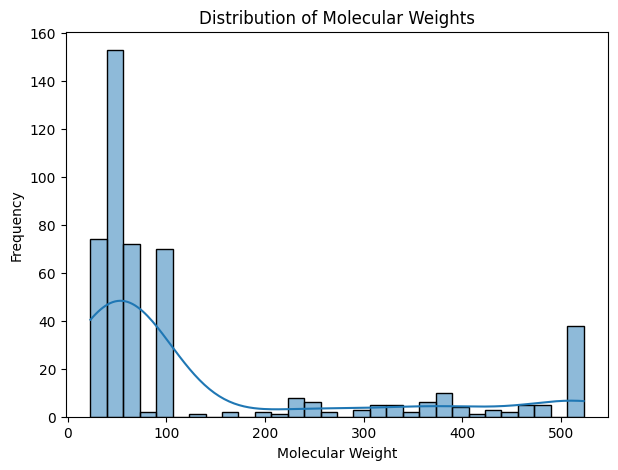

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of molecular weights
plt.figure(figsize=(7, 5))
sns.histplot(merge['molecular_weight'], bins=30, kde=True)
plt.title('Distribution of Molecular Weights')
plt.xlabel('Molecular Weight')
plt.ylabel('Frequency')

**Show relationship/correlation type between molecular weight and Logp**

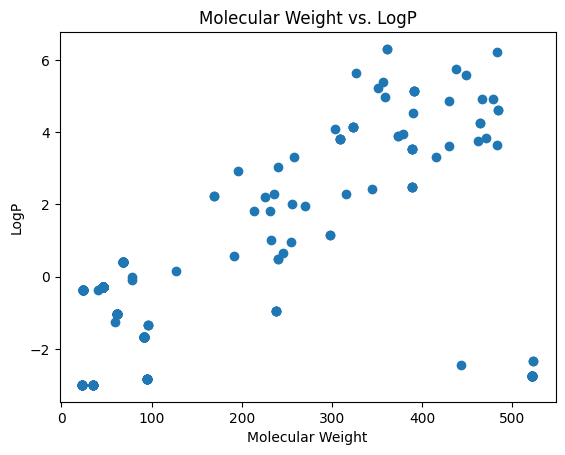

In [146]:
plt.plot(merge['molecular_weight'], merge['LogP'], 'o')
plt.xlabel('Molecular Weight')
plt.ylabel('LogP')
plt.title('Molecular Weight vs. LogP')
plt.show()

**It is rougly a positive correlation**
**Logp increases with molecular weight**

**This portrays a positive correlation and a Linear Regression estimator can be used to model the system**

**Incorporate molecular weight and Logp into df2**

In [147]:
# add them to df2
df2['molecular_weight'] = df3
df2['LogP'] = df4
df2

PDBID   CODE                                        LIGAND_NAME smiles  \
0    8xjj  A1LVJ  5-[4-[[(1~{R})-1-[3-[bis(fluoranyl)methyl]-2-f...          
1    8xjj    EDO                                     1,2-ETHANEDIOL          
2    8xjj    EDO                                     1,2-ETHANEDIOL          
3    8xjj    EDO                                     1,2-ETHANEDIOL          
4    8xjj    EDO                                     1,2-ETHANEDIOL          
..    ...    ...                                                ...    ...   
528  6y44     CA                                        CALCIUM ION          
529  6f08    1PE                               PENTAETHYLENE GLYCOL          
530  6f08    1PE                               PENTAETHYLENE GLYCOL          
531  6f08    1PE                               PENTAETHYLENE GLYCOL          
532  6f08    1PE                               PENTAETHYLENE GLYCOL          

                 SMILES      ChEMBL_ID  \
0                  None           None   
1                C(CO)O           None   
2                C(CO)O           None   
3                C(CO)O           None   
4                C(CO)O           None   
..                  ...            ...   
528              [Ca+2]           None   
529  C(COCCOCCOCCOCCO)O  CHEMBL1229766   
530  C(COCCOCCOCCOCCO)O  CHEMBL1229766   
531  C(COCCOCCOCCOCCO)O  CHEMBL1229766   
532  C(COCCOCCOCCOCCO)O  CHEMBL1229766   

                                             molecule  molecular_weight  \
0                                                None               NaN   
1    <rdkit.Chem.rdchem.Mol object at 0x7c320ad495b0>            62.068   
2    <rdkit.Chem.rdchem.Mol object at 0x7c31f7354b30>            62.068   
3    <rdkit.Chem.rdchem.Mol object at 0x7c31f7354ac0>            62.068   
4    <rdkit.Chem.rdchem.Mol object at 0x7c31f7354ba0>            62.068   
..                                                ...               ...   
528  <rdkit.Chem.rdchem.Mol object at 0x7c320b13dc40>            40.078   
529  <rdkit.Chem.rdchem.Mol object at 0x7c320b13dcb0>           238.280   
530  <rdkit.Chem.rdchem.Mol object at 0x7c320b13dd20>           238.280   
531  <rdkit.Chem.rdchem.Mol object at 0x7c320b13dd90>           238.280   
532  <rdkit.Chem.rdchem.Mol object at 0x7c320b13de00>           238.280   

       LogP  
0       NaN  
1   -1.0290  
2   -1.0290  
3   -1.0290  
4   -1.0290  
..      ...  
528 -0.3808  
529 -0.9626  
530 -0.9626  
531 -0.9626  
532 -0.9626  

[533 rows x 9 columns]

In [148]:
df_activity['standard_value'] # standard vaule is an important activity feature of the ligands

0      25000.0
1          1.3
2          1.2
3          1.9
4         78.0
        ...   
995       None
996       None
997       61.0
998       99.0
999       65.7
Name: standard_value, Length: 1000, dtype: object

In [149]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PDBID             533 non-null    object 
 1   CODE              533 non-null    object 
 2   LIGAND_NAME       533 non-null    object 
 3   smiles            533 non-null    object 
 4   SMILES            482 non-null    object 
 5   ChEMBL_ID         211 non-null    object 
 6   molecule          482 non-null    object 
 7   molecular_weight  482 non-null    float64
 8   LogP              482 non-null    float64
dtypes: float64(2), object(7)
memory usage: 37.6+ KB


In [150]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   action_type                124 non-null    object
 1   activity_comment           176 non-null    object
 2   activity_id                1000 non-null   int64 
 3   activity_properties        1000 non-null   object
 4   assay_chembl_id            1000 non-null   object
 5   assay_description          1000 non-null   object
 6   assay_type                 1000 non-null   object
 7   assay_variant_accession    4 non-null      object
 8   assay_variant_mutation     4 non-null      object
 9   bao_endpoint               1000 non-null   object
 10  bao_format                 1000 non-null   object
 11  bao_label                  1000 non-null   object
 12  canonical_smiles           1000 non-null   object
 13  data_validity_comment      3 non-null      object
 14  data_vali

**Check if the number of rows of the molecular weight/Logp are consistent**

In [151]:
X = df2[['molecular_weight', 'LogP']]
y = df_activity['standard_value']
print(len(X))
print(len(y))

533
1000


**Building model on this X and y split will return error of inconsistence dimensions, hence needs to be trimmed to match as follows**

In [152]:
if len(X) > len(y):
    X_trimmed = X.iloc[:len(y)]
    y_trimmed = y
elif len(y) > len(X):
    y_trimmed = y.iloc[:len(X)]
    X_trimmed = X
else:
    X_trimmed = X
    y_trimmed = y


In [153]:
print(len(X_trimmed))
print(len(y_trimmed)) # Now the dimensions are equal and can be modeled with Regression model (RandonForestRegressor)

533
533


**The number of rows are equal from sampling**
**can be modeled with Regression model (RandonForestRegressor)**

In [154]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error

#  convert standard values to float data type and drop NAN rows
y = df_activity['standard_value'].astype(float).dropna()
X = df2[['molecular_weight', 'LogP']].dropna()  # Drop rows with missing descriptors

if len(X) > len(y):
    X_trimmed = X.iloc[:len(y)]
    y_trimmed = y
elif len(y) > len(X):
    y_trimmed = y.iloc[:len(X)]
    X_trimmed = X
else:
    X_trimmed = X
    y_trimmed = y

# Split the data into training and testing sets
X_trimmed_train, X_trimmed_test, y_trimmed_train, y_trimmed_test = train_test_split(X_trimmed, y_trimmed,
                                                    test_size=0.2,
                                                    random_state=42)
# random_state does the work of random seed to retrict to a set of the possible random combinations

# Create a Random Forest Regressor model
model = RandomForestRegressor() # instantiate the estimatoe

# Fit the model to the training data
model.fit(X_trimmed_train, y_trimmed_train)

# Make predictions on the test data
y_pred = model.predict(X_trimmed_test)

# Evaluate the model
mse = mean_squared_error(y_trimmed_test, y_pred)
r2 = r2_score(y_trimmed_test, y_pred)
mae = mean_absolute_error(y_trimmed_test, y_pred)
rmse = np.sqrt(mse)
evs = explained_variance_score(y_trimmed_test, y_pred)
median_ae = median_absolute_error(y_trimmed_test, y_pred)


print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 696903862.6351483
R-squared: 0.03836325099088267


In [155]:
!python -m pip install https://github.com/MolecularAI/QSARtuna/releases/download/3.1.1/qsartuna-3.1.1.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/ireis/PRF.git (to revision 7ed097c26bbe9af0df0e724ac3b720f534cdc510) to /tmp/pip-install-ilrik9cj/prf_514800aa451242efaa2f71126ea56f80
  Running command git clone --filter=blob:none --quiet https://github.com/ireis/PRF.git /tmp/pip-install-ilrik9cj/prf_514800aa451242efaa2f71126ea56f80
  Running command git rev-parse -q --verify 'sha^7ed097c26bbe9af0df0e724ac3b720f534cdc510'
  Running command git fetch -q https://github.com/ireis/PRF.git 7ed097c26bbe9af0df0e724ac3b720f534cdc510
  Resolved https://github.com/ireis/PRF.git to commit 7ed097c26bbe9af0df0e724ac3b720f534cdc510
  Preparing metadata (setup.py) ... done
  Using cached MAPIE-0.6.4-py3-none-any.whl.metadata (11 kB)
  Using cached amorprot-0.0.5-py3-none-any.whl.metadata (374 bytes)
  Using

**Try this modellinf with QSARtuna**

In [156]:
!python --version


Python 3.10.12


**My python version mismatches the requirement for QSARtuna, hence not installed, So I stick to RandomForest Regressor model**

In [157]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

# **Task 3 Perform Molecular Matched Pair Analysis**
I am using rdkit

In [158]:
from rdkit import Chem
from rdkit.Chem import rdFMCS

# df2' contains your molecules with SMILES
smiles_list = df2['SMILES'].dropna().tolist()  # Read as list from DataFrame, removing missing SMILES

# Perform MMP analysis
pairs = []
for i in range(len(smiles_list)):
    for j in range(i + 1, len(smiles_list)):
        mol1 = Chem.MolFromSmiles(smiles_list[i])
        mol2 = Chem.MolFromSmiles(smiles_list[j])
        if mol1 and mol2:
            mcs = rdFMCS.FindMCS([mol1, mol2])
            if mcs.numAtoms > 0:  # Check if a common substructure was found
                pairs.append((smiles_list[i], smiles_list[j], mcs.smartsString))

# Result processing and Analysis
print("MMP Analysis Results:")
for smiles_a, smiles_b, mcs_smarts in pairs:
    print(f"Molecule 1: {smiles_a}")
    print(f"Molecule 2: {smiles_b}")
    print(f"MCS SMARTS: {mcs_smarts}")
    print("-" * 40)
# present this in dataframe for easy visualizzation
#df_match_pair


Streaming output truncated to the last 5000 lines.
Molecule 1: C(C(CO)O)O
Molecule 2: [O-]P(=O)([O-])[O-]
MCS SMARTS: [#8]
----------------------------------------
Molecule 1: C(C(CO)O)O
Molecule 2: [O-]P(=O)([O-])[O-]
MCS SMARTS: [#8]
----------------------------------------
Molecule 1: C(C(CO)O)O
Molecule 2: [O-]P(=O)([O-])[O-]
MCS SMARTS: [#8]
----------------------------------------
Molecule 1: C(C(CO)O)O
Molecule 2: [O-]P(=O)([O-])[O-]
MCS SMARTS: [#8]
----------------------------------------
Molecule 1: C(C(CO)O)O
Molecule 2: C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)OP(=O)(O)OP(=O)(O)O)O)O)N=C(NC2=O)N
MCS SMARTS: [#6](-[#6](-[#6]-[#8])-[#8])-[#8]
----------------------------------------
Molecule 1: C(C(CO)O)O
Molecule 2: C1=NC2=C(N1C3C(C(C(O3)COP(=O)(O)OP(=O)(NP(=O)(O)O)O)O)O)N=C(NC2=O)N
MCS SMARTS: [#6](-[#6](-[#6]-[#8])-[#8])-[#8]
----------------------------------------
Molecule 1: C(C(CO)O)O
Molecule 2: C1CCC2=NC3=C(C=C(C=C3)Cl)C(=C2C1)NC4=CC(=C(C=C4)F)Cl
MCS SMARTS: [#6]-[#6]-[#6]
--

**DataFrame of matched pairs**

In [159]:
# present this in dataframe for easy visualizzation
df_match_pair = pd.DataFrame(pairs)
df_match_pair.head(10)

0       1                      2
0  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
1  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
2  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
3  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
4  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
5  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
6  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
7  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
8  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]
9  C(CO)O  C(CO)O  [#6](-[#6]-[#8])-[#8]

# **Perfom Free Wilson Analysis**

In [160]:
!pip install mordred
from mordred import Calculator, descriptors


In [161]:
!pip install papyrus-python

ERROR: Could not find a version that satisfies the requirement papyrus-python (from versions: none)
ERROR: No matching distribution found for papyrus-python


**papyrus version not installing, Hence I am using the model method for Free-wilson analysis**

Estimator = LinearRegressor form scikit learn linear model

In [162]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [163]:
import pandas as pd

# Replace 'standard_value' with the actual column name for the activity values
y = df_activity['standard_value'].astype(float).dropna()
X = df2[['molecular_weight', 'LogP']].dropna()  # Drop rows with missing descriptors

# One-hot encode the presence/absence of each substructure (from MMP analysis)
substructures = list(set([mcs for _, _, mcs in pairs]))
substructure_presence = pd.DataFrame(index=df2.index, columns=substructures)
for i, row in df2.iterrows():
    for substructure in substructures:
        substructure_presence.loc[i, substructure] = int(substructure in row[['SMILES']])

# Combine descriptors and substructure presence
X = pd.concat([X, substructure_presence], axis=1).dropna()

# Align dataframes to have the same indices
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Perform linear regression (Free-Wilson analysis)
model = LinearRegression()
model.fit(X, y)

# Analyze coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values('Coefficient', key=abs, ascending=False))


                                               Feature  Coefficient
1                                                 LogP  -384.361217
0                                     molecular_weight     8.331342
665                                          [#6]:[#6]     0.000000
437  [#6]-[#6](-,:[#6])-,:[#6]:[#6](:,-[#6]):[#6]:[...     0.000000
439  [#6]1-,:[#6]-,:[#6]-,:[#6](:[#6](-,:[#6]-,:1):...     0.000000
..                                                 ...          ...
223  [#6]1:[#6](:[#6]:[#6](:[#6]:[#6]:1)-[#16](=[#8...     0.000000
224  [#6](-[#6]-[#7]-[#6])-[#6](-[#6])-[#6]1:[#6]:[...     0.000000
225  [#6]-[#6]-,:[#7](-[#6]-[#6]1:[#6]:[#6]:[#6]:[#...     0.000000
226                        [#6]1:[#6]:[#7]:[#6]:[#7]:1     0.000000
666  [#6]-[#6](-[#6]:[#6]:[#6]:,-[#6]:[#6]:[#6])-[#...     0.000000

[667 rows x 2 columns]


In [164]:
# present this in dataframe for easy visualization
coefficients.sort_values('Coefficient', key=abs, ascending=False)

Feature  Coefficient
1                                                 LogP  -384.361217
0                                     molecular_weight     8.331342
665                                          [#6]:[#6]     0.000000
437  [#6]-[#6](-,:[#6])-,:[#6]:[#6](:,-[#6]):[#6]:[...     0.000000
439  [#6]1-,:[#6]-,:[#6]-,:[#6](:[#6](-,:[#6]-,:1):...     0.000000
..                                                 ...          ...
223  [#6]1:[#6](:[#6]:[#6](:[#6]:[#6]:1)-[#16](=[#8...     0.000000
224  [#6](-[#6]-[#7]-[#6])-[#6](-[#6])-[#6]1:[#6]:[...     0.000000
225  [#6]-[#6]-,:[#7](-[#6]-[#6]1:[#6]:[#6]:[#6]:[#...     0.000000
226                        [#6]1:[#6]:[#7]:[#6]:[#7]:1     0.000000
666  [#6]-[#6](-[#6]:[#6]:[#6]:,-[#6]:[#6]:[#6])-[#...     0.000000

[667 rows x 2 columns]

# **Docking**

**Needed tools:

Gnina,

Smina,

rdkit,

pandas,

maptplotlib

**

**From documentation, Gnina is not a python package, but can be run on python script with subprocees**



In [165]:
import requests
import os

# Define the PDB ID and output file path
pdb_id = "5OVF"
output_file = "5OVF.pdb"

# Construct the URL to download the PDB file from rcsb pdb site
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"

# Download the PDB file
response = requests.get(url)

# Save the PDB file
with open(output_file, "wb") as f:
    f.write(response.content)

print(f"PDB file {pdb_id}.pdb downloaded successfully.")


PDB file 5OVF.pdb downloaded successfully.


**lets view the structure**

In [166]:
!pip install pymol-open-source


ERROR: Could not find a version that satisfies the requirement pymol-open-source (from versions: none)
ERROR: No matching distribution found for pymol-open-source


**pymol not installing**

**Lets try nglview**

In [167]:
#lets try nglview
!pip install nglview


In [168]:
import nglview as nv

# Load the PDB file
view = nv.show_file("5OVF.pdb")

# Display the structure
view


NGLWidget()

In [169]:
view.render_image()

Image(value=b'', width='99%')

Support for third party widgets will remain active for the duration of the session. To disable support:

In [170]:
from google.colab import output
output.disable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

**Not showing properly with NGL vieing lets try py3dmol**

In [171]:
!pip install py3Dmol # install Py3Dmol


In [172]:
import py3Dmol

# Create a viewer
view = py3Dmol.view(width=400, height=300)

# Load the PDB file content
with open('5OVF.pdb', 'r') as file:
    pdb_data = file.read()

# Add the structure to the viewer
view.addModel(pdb_data, 'pdb')

# Set the visualization style (e.g., cartoon, sticks)
view.setStyle({'cartoon': {'color': 'spectrum'}})

# Center and zoom
view.zoomTo()

# Show the structure

view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

**Beautiful, structure is visualized on Py3Dmol**

In [173]:
from google.colab import output
output.enable_custom_widget_manager()

**The pdb file format is not compactible for docking on docking tools, we need to convert to pdbqt**

**Install openbabel, to convert pdb to pdbqt**

In [174]:
# install openbabel to help convert the pdb file for the docking executable pdbqt format
!apt-get update
!apt-get install -y openbabel



Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,562 kB]
Get:14 https://r2u.stat.illinois.edu/ubuntu jammy/ma

# Docking Task 1
**write an automated pipeline using Smina to perform a virtual screening experiment on SOS1 (PDB ID: 5OVF) with at least 10 small molecules that are both biologically relevant and synthetically accessible.**

In [175]:
# Install dependencies
!apt-get install -y cmake libboost-all-dev

# Clone the Gnina repository
!git clone https://github.com/gnina/gnina.git

# Navigate to the gnina directory
%cd gnina

# Build Gnina
!mkdir build
%cd build
!cmake ..
!make

# Install Gnina
!make install


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libboost-all-dev is already the newest version (1.74.0.3ubuntu7).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
Cloning into 'gnina'...
remote: Enumerating objects: 43991, done.
remote: Counting objects: 100% (1328/1328), done.
remote: Compressing objects: 100% (637/637), done.
remote: Total 43991 (delta 664), reused 1253 (delta 618), pack-reused 42663 (from 1)
Receiving objects: 100% (43991/43991), 246.04 MiB | 11.87 MiB/s, done.
Resolving deltas: 100% (28950/28950), done.
Updating files: 100% (837/837), done.
/content/gnina/build/gnina
/content/gnina/build/gnina/build
-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- The CUDA compiler identification is NVIDIA 12.2.140
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working 

# Installing Gnina gave a lot of problem, I want to try Smnia

In [176]:
!apt-get update
!apt-get install -y build-essential cmake wget



Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [177]:
# Build smina from source
!apt-get update
!apt-get install -y wget


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [178]:
# clone smina
!git clone https://github.com/mwojcikowski/smina.git


Cloning into 'smina'...
remote: Enumerating objects: 3146, done.
remote: Total 3146 (delta 0), reused 0 (delta 0), pack-reused 3146 (from 1)
Receiving objects: 100% (3146/3146), 2.00 MiB | 12.72 MiB/s, done.
Resolving deltas: 100% (1443/1443), done.


**Docking with Smina**

In [179]:
# Prepare protein
!obabel 5OVF.pdb -O protein.pdbqt -xr -p 7.4

# Download sample biologically relevant and synthetically accessible molecules
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/ace.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/benzene.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/ind.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/pyridine.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/toluene.sdf
# Add more molecules here (at least 10) ...

# Convert ligands to pdbqt
!obabel *.sdf -O ligands.pdbqt -m

# Define docking parameters
receptor = "protein.pdbqt"
ligands = "ligands.pdbqt"
out = "docking_results.sdf"
center_x = -7.5
center_y = 23.5
center_z = 21.0
size_x = 20
size_y = 20
size_z = 20

# Run Smina
!smina --receptor $receptor --ligand $ligands --center_x $center_x --center_y $center_y --center_z $center_z --size_x $size_x --size_y $size_y --size_z $size_z --out $out


*** Open Babel Error  in OpenAndSetFormat
  Cannot open 5OVF.pdb
0 molecules converted
*** Open Babel Error  in OpenAndSetFormat
  Cannot open *.sdf
0 molecules converted
/bin/bash: line 1: smina: command not found


In [180]:
!ls -l smina


total 52
drwxr-xr-x 6 root root  4096 Aug 28 13:46 build
drwxr-xr-x 2 root root  4096 Aug 28 13:46 examples
-rw-r--r-- 1 root root 11358 Aug 28 13:46 LICENSE.APACHE
-rw-r--r-- 1 root root 15220 Aug 28 13:46 LICENSE.GNU
-rw-r--r-- 1 root root  9451 Aug 28 13:46 README
drwxr-xr-x 9 root root  4096 Aug 28 13:46 src


In [181]:
!apt-get install -y openbabel

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openbabel is already the newest version (3.1.1+dfsg-6ubuntu5).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.


In [182]:
!pip install openbabel-wheel


In [183]:
!apt-get update
!apt-get install -y build-essential cmake


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [184]:
# Install dependencies
!apt-get install -y build-essential cmake wget openbabel

# Clone the Smina repository (if not already cloned)
!git clone https://github.com/mwojcikowski/smina.git

# Navigate to the smina directory
%cd smina

# Build Smina (if not already built)
!mkdir build
%cd build
!cmake ..
!make

# Go back to the main directory
%cd ../..

# Prepare protein
!obabel 5OVF.pdb -O protein.pdbqt -xr -p 7.4

# Download sample biologically relevant and synthetically accessible molecules  5ovf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/ace.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/benzene.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/ind.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/pyridine.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/toluene.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/adamantane.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/benzocaine.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/butane.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/caffeine.sdf
!wget -q https://raw.githubusercontent.com/mwojcikowski/smina/master/test/ethanol.sdf

# Convert ligands to pdbqt
!obabel *.sdf -O ligands.pdbqt -m

# Define docking parameters
receptor = "protein.pdbqt"
ligands = "ligands.pdbqt"
out = "docking_results.sdf"
center_x = -7.5
center_y = 23.5
center_z = 21.0
size_x = 20
size_y = 20
size_z = 20

# Run Smina
!smina --receptor $receptor --ligand $ligands --center_x $center_x --center_y $center_y --center_z $center_z --size_x $size_x --size_y $size_y --size_z $size_z --out $out




Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
openbabel is already the newest version (3.1.1+dfsg-6ubuntu5).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
fatal: destination path 'smina' already exists and is not an empty directory.
/content/gnina/build/gnina/build/smina
mkdir: cannot create directory ‘build’: File exists
/content/gnina/build/gnina/build/smina/build
CMake Warning:
  Ignoring extra path from command line:

   ".."


CMake Error: The source directory "/content/gnina/build/gnina/build/smina" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.
/content/gnina/build/gnina/build
*** Open Babel Error  in OpenAndSe

**Smina giving issues, even after succefully installed and cloned, I want to try plants**

In [185]:
# confirming if openbabel is successfully installed
import openbabel
from openbabel import pybel

print("Open Babel and Pybel are successfully installed!")


Open Babel and Pybel are successfully installed!


**I cant get through with Gnina, Smina and Plants, I need further education, But i can make do with autodock vina**

**Trying with autodock vina**

In [186]:
# Install required packages
!apt-get update
!apt-get install -y python3-pip
!pip install biopython

# Install AutoDock Vina
!wget https://github.com/ccsb-scripps/AutoDock-Vina/releases/download/v1.2.3/vina_1.2.3_linux_x86_64.tar.gz
!tar -xzf vina_1.2.3_linux_x86_64.tar.gz
!chmod +x vina


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [187]:
from openbabel import pybel
import subprocess

ligands_sdf = '/content/drive/MyDrive/Colab Notebooks/ligands.sdf'
#receptor_pdb = '/content/drive/MyDrive/Colab Notebooks/5OVF.pdb'

# Define the PDB ID and output file path
pdb_id = "5OVF"
receptor_pdb = "5OVF.pdb"

# Construct the URL to download the PDB file from rcsb pdb site
url = f"https://files.rcsb.org/download/{pdb_id}.pdb"

# Download the PDB file
response = requests.get(url)



# Save the PDB file
with open(receptor_pdb, "wb") as f:
    f.write(response.content)

# Define paths
receptor_pdb = '5OVF.pdb'
ligands_sdf = 'ligands.sdf'
receptor_pdbqt = 'receptor.pdbqt'
ligands_pdbqt = 'ligands.pdbqt'

# Convert receptor PDB to PDBQT format
receptor = pybel.readfile('pdb', receptor_pdb).__next__()
receptor.removeh()  # Remove hydrogens
receptor.addh()     # Add hydrogens
receptor.write('pdbqt', receptor_pdbqt, overwrite=True)

# Convert ligands SDF to PDBQT format
ligands = pybel.readfile('sdf', ligands_sdf)
for ligand in ligands:
    ligand.addh()  # Add hydrogens
    ligand.write('pdbqt', ligands_pdbqt, overwrite=True)

print(f"Converted receptor to {receptor_pdbqt} and ligands to {ligands_pdbqt}.")


*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is 5OVF.pdb)



OSError: No such file: 'ligands.sdf'

In [ ]:
# Create AutoDock Vina configuration file
config_file = 'config.txt'
with open(config_file, 'w') as f:
    f.write(f"""# AutoDock Vina configuration file
    receptor = {receptor_pdbqt}
    ligand = {ligands_pdbqt}
    center_x = 0
    center_y = 0
    center_z = 0
    size_x = 20
    size_y = 20
    size_z = 20
    num_modes = 9
    exhaustiveness = 8
    """)
import subprocess

# Define the output file path
output_file = 'docking_output.pdbqt'
log_file = 'docking_log.txt'

# Run AutoDock Vina
result = subprocess.run(['./vina', '--config', config_file, '--out', output_file, '--log', log_file], capture_output=True, text=True)

# Print results
print('Vina Output:')
print(result.stdout)
print('Vina Errors:')
print(result.stderr)


In [ ]:
# Print docking log
with open(log_file, 'r') as f:
    log_contents = f.read()
print('Docking Log:')
print(log_contents)


# Docking Task 2
**Write an automated pipeline using Gnina (or alternative tools) to perform covalent docking on G12C. Utilize CovPDB to identify the appropriate warhead for covalent docking. Refer to the ChemBL/BindingDB ligands for inspiration.**

In [ ]:
!pip install covpdb
import covpdb
protein_id = '6OIM'
warheads = covpdb.get_warheads(protein_id)
print(warheads)

In [ ]:
# Use cvpdb to identify warhead
!pip install covpdb
import covpdb
import requests
protein_id = '6OIM'


def fetch_covpdb_ligands(protein_id):
    url = f'https://covpdb.cc/ligands/{protein_id}'  # Assuming CovPDB API or web interface
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()  # if it returns ajson data
    else:
        print(f"Error fetching data from CovPDB: {response.status_code}")
        return None

def identify_warhead(ligands):
    for ligand in ligands:
        if ligand['type'] == 'warhead':  # Assuming the data categorizes the ligands
            return ligand['smiles']  # Return the SMILES of the warhead
    return None

# Step to execute for 6OIM
protein_id = '6OIM'  # PDB ID for the target protein
ligands = fetch_covpdb_ligands(protein_id)

if ligands:
    warhead_smiles = identify_warhead(ligands)
    if warhead_smiles:
        print(f"Identified warhead for covalent docking in 6OIM: {warhead_smiles}")
    else:
        print("No warhead identified in CovPDB data for 6OIM.")
else:
    print("No ligand data retrieved from CovPDB.")


# Docking Task 2

**write a complete pipeline that:**

**Enumeratesthe GBB Reaction using suitably selected building blocks (from Reaxys or Enamine) obtained via SMARTS strings**

In [ ]:
# Hint:
# smarts_string = "[#7:3]~[#6:1]-[#7:2].[C-:4]#[N+:5].[#6:7]=O>>[#7:5]-[#6:4]-1=[#6:7]-[#7:2]=[#6:1]-[#7:3]-1"

!pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# Define the GBB reaction SMARTS string
smarts_string = "[#7:3]~[#6:1]-[#7:2].[C-:4]#[N+:5].[#6:7]=O>>[#7:5]-[#6:4]-1=[#6:7]-[#7:2]=[#6:1]-[#7:3]-1"

# Create a reaction from the SMARTS string
rxn = AllChem.ReactionFromSmarts(smarts_string)


# Building blocks
building_blocks = [
    ("[#7H]~C-N", "amine"),  # Primary amine
    ("C#N", "isonitrile"),  # Isonitrile
    ("C=O", "aldehyde"),  # Aldehyde
]

# Generate possible products
products = []
for amine_smarts, amine_name in building_blocks:
  for isonitrile_smarts, isonitrile_name in building_blocks:
    for aldehyde_smarts, aldehyde_name in building_blocks:
      amine = Chem.MolFromSmarts(amine_smarts)
      isonitrile = Chem.MolFromSmarts(isonitrile_smarts)
      aldehyde = Chem.MolFromSmarts(aldehyde_smarts)
      if amine and isonitrile and aldehyde:
        try:
          ps = rxn.RunReactants((amine, isonitrile, aldehyde))
          for p in ps:
            products.append((p[0], f"{amine_name}-{isonitrile_name}-{aldehyde_name}"))
        except:
          pass

# Draw the products
if products:
  for product, name in products:
    print(name)
    Draw.MolToImage(product)
else:
  print("No products found.")


# **Molecular Dynamics Simulations of 5OVF Protein with GROMACS**
** Task 1**
**GROMACS: GROningen MAchine for Chemical Simulations**

In [ ]:
# call the parameter files from drive
from google.colab import drive
drive.mount('/content/drive')



In [ ]:
# confirm availability of my parameter files on drive
files = os.listdir('/content/drive/MyDrive/Colab Notebooks')
print(files)
import pandas as pd
fl =pd.DataFrame(files)
fl.to_csv('files.csv' , index=False)
fl

In [ ]:
# call the parameter files from drive
ions = '/content/drive/MyDrive/Colab Notebooks/ions.mdp'
minim = '/content/drive/MyDrive/Colab Notebooks/minim.mdp'
nvt = '/content/drive/MyDrive/Colab Notebooks/nvt.mdp'
npt = '/content/drive/MyDrive/Colab Notebooks/npt.mdp'
md = '/content/drive/MyDrive/Colab Notebooks/md.mdp'

with open(ions, 'r') as file:
    content_ions = file.read()
with open(minim, 'r') as file:
    content_minim = file.read()
with open(nvt, 'r') as file:
  content_nvt = file.read()
with open(npt, 'r') as file:
  content_npt = file.read()
with open(md, 'r') as file:
  content_md = file.read
content_ions
content_minim
content_nvt
content_npt
content_md


# Simple Molecular Dynamics Simulation of 5OVF with Gromacs
**GROMACS:**
Gronigen Machine for Molecular Simulation

In [ ]:

# Create a directory for the simulation
!mkdir simulation

# Copy the protein file to the simulation directory
!cp 5OVF.pdb simulation/

# Go to the simulation directory
%cd simulation

# Generate topology
!gmx pdb2gmx -f 5OVF.pdb -o 5OVF_processed.gro -ff amber99sb -water tip3p

# Define box
!gmx editconf -f 5OVF_processed.gro -o 5OVF_boxed.gro -c -d 1.0 -bt cubic

# Solvate the system
!gmx solvate -cp 5OVF_boxed.gro -cs spc216.gro -o 5OVF_solvated.gro -p topol.top

# Add ions
!gmx grompp -f /content/drive/MyDrive/Colab\ Notebooks/ions.mdp -c 5OVF_solvated.gro -p topol.top -o ions.tpr
!gmx genion -s ions.tpr -o 5OVF_ionized.gro -p topol.top -pname NA -nname CL -neutral

# Energy minimization
!gmx grompp -f /content/drive/MyDrive/Colab\ Notebooks/minim.mdp -c 5OVF_ionized.gro -p topol.top -o em.tpr
!gmx mdrun -v -deffnm em -cpi

# NVT equilibration
!gmx grompp -f /content/drive/MyDrive/Colab\ Notebooks/nvt.mdp -c em.gro -p topol.top -o nvt.tpr
!gmx mdrun -v -deffnm nvt -cpi

# NPT equilibration
!gmx grompp -f /content/drive/MyDrive/Colab\ Notebooks/npt.mdp -c nvt.gro -p topol.top -o npt.tpr
!gmx mdrun -v -deffnm npt -cpi

# Production MD run
!gmx grompp -f /content/drive/MyDrive/Colab\ Notebooks/md.mdp -c npt.gro -p topol.top -o md.tpr
!gmx mdrun -v -deffnm md -cpi

# Analyze the trajectory (example: RMSD)
!gmx rms -s md.tpr -f md.xtc -o rmsd.xvg -tu ns

# Go back to the main directory
%cd ..


In [ ]:
# Convert the PDB file to Gromacs format
!obabel 5OVF.pdb -O 5OVF.gro

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# **Exploration**
**Reinvent4**
Generation and optimization of novel chemical structures that could potentially be developed into drugs.

In [188]:
# Assume we have a dataset of known SOS1 inhibitors in SMILES format
sos1_inhibitors = [
    "CC(C)Nc1ncnc2c1ncn2C1CCOC1",
    "CC(C)c1ccc(NC(=O)C2=Nc3ccc(N)c(Oc4ccc(Cl)cc4)c3N=C2)cc1",
    "O=C(Nc1ccc2c(c1)cc(n2)NC(=O)CCl)Nc1ccc2c(c1)cc(n2)NC(=O)CCl",
    "CC(C)C1=NC2=C(N1)N=C(NC2=O)C1CCCCC1",
    "CC1=C2N=C(NC3=C(N=CN3C)C2=NC=N1)C1CCCCC1"
]

# I am using just a simple representation instaed of the APIs and other tools
from rdkit import Chem
from rdkit.Chem import Draw

# Convert SMILES to RDKit molecules
rdkit_structures = [Chem.MolFromSmiles(smiles) for smiles in sos1_inhibitors]

# Visualization
structure_image = Draw.MolsToGridImage(molecules, molsPerRow=3)
structure_image

# Initialize REINVENT or a similar model and fine-tune on the SOS1 inhibitors dataset
# This step involves setting up the model, loading the dataset, and defining the reward function


[13:57:46] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


TypeError: No registered converter was able to extract a C++ pointer to type RDKit::ROMol from this Python object of type str

In [ ]:
# Generate new molecules
# This would typically involve running the model in inference mode and generating SMILES strings.
generated_smiles = [
    "CC(C)Nc1ccc(C2=NN=C(S2)N(C)C)cc1",  # smile 1
    "CC(C)C1=NN=C(N1)C1=NC=CC=N1C",       # smile 2
    "O=C(NC1=CC=CC=C1)N1CCCCN1C(=O)C",    # smile 3
    "CC1=NC(C)=C(C=C1)C1=CC=CN=C1",       # smile 4
    "C1CCN(CC1)C1=CC=CC=C1"               # smile 5
]

# Convert generated SMILES to RDKit molecules for visualization
generated_molecules = [Chem.MolFromSmiles(smiles) for smiles in generated_smiles]

# Visualize the generated molecules
img_generated = Draw.MolsToGridImage(generated_molecules, molsPerRow=3)
img_generated
